In [ ]:
# Для запуска необходимо скопировать в папку CL_Cup IT 2024_Сбер_dataset.csv (слишком большой, не влезает в размер архива)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from scipy import stats

import datetime

In [3]:
data_origin = pd.read_csv("CL_Cup IT 2024_Сбер_dataset.csv", parse_dates=['date_of', 'ctl_loading_date'])

In [4]:
data_origin = data_origin.drop_duplicates()

In [5]:
data_origin.head()

benchmark_id  \
0  00000000-0000-0000-0000-000000000001   
1  005F4F7B-D562-4B0F-BDC9-EB892065A955   
2  03B447D1-2B2D-4AC2-90C1-5DF2935D4FD1   
3  050C195A-1D74-402F-B36D-63CA40AFE789   
5  0532FCD2-5A26-4ED7-83C1-F482BE949312   

                                      benchmark_name    date_of       quote  \
0                                             Ruonia 2018-04-09  513.893595   
1                                          RUGBITR1Y 2018-04-09  153.916680   
2                   50%RUCBITRBB3Y + 50%RUCBITRBBB3Y 2018-04-09   48.649655   
3                     60% RUGBITR1Y+40% RUONIA Index 2018-04-09  277.774791   
5  30.00%RUGBITR1Y + 1.10%ОФЗ-29006 + 68.90%ОФЗ-2... 2018-04-09   63.836133   

   ctl_loading ctl_loading_date  
0  38463471715       2018-04-09  
1  38463471715       2018-04-09  
2  38463471715       2018-04-09  
3  38463471715       2018-04-09  
5  38463471715       2018-04-09

# Строим граффики

In [6]:
count_values_by_benchmark  = data_origin.groupby(['benchmark_id']).count().sort_values(['benchmark_name']).reset_index()

In [7]:
count_values_by_benchmark['count_vals'] = count_values_by_benchmark.ctl_loading_date
count_values_by_benchmark

benchmark_id  benchmark_name  date_of  quote  \
0    00000000-0000-0000-0000-000000000001              17       17     17   
1    005F4F7B-D562-4B0F-BDC9-EB892065A955              34       34     34   
2    03B447D1-2B2D-4AC2-90C1-5DF2935D4FD1              51       51     51   
3    0532FCD2-5A26-4ED7-83C1-F482BE949312             102      102    102   
4    070B1DF3-5251-46A3-B706-B693B7148BC8             119      119    119   
..                                    ...             ...      ...    ...   
511  90AA2A8A-CAD9-4B15-87A7-490B0A6BA7B5            3171     3171   3171   
512  506BA5FE-BF38-46C2-873A-D6DACE1BA323            3299     3299   3299   
513  26C3226E-F705-45C8-A44B-A042514C399D            3390     3390   3390   
514  8A21A189-731B-4980-A5B2-69D6C4CF0C70            3419     3419   3419   
515  0905DD53-71A1-4712-B192-A9CE947BBD65            3583     3583   3583   

     ctl_loading  ctl_loading_date  count_vals  
0             17                17          17  
1             34                34          34  
2             51                51          51  
3            102               102         102  
4            119               119         119  
..           ...               ...         ...  
511         3171              3171        3171  
512         3299              3299        3299  
513         3390              3390        3390  
514         3419              3419        3419  
515         3583              3583        3583  

[516 rows x 7 columns]

In [8]:
fig = px.line(count_values_by_benchmark, x="benchmark_id", y="benchmark_name")
fig.show()

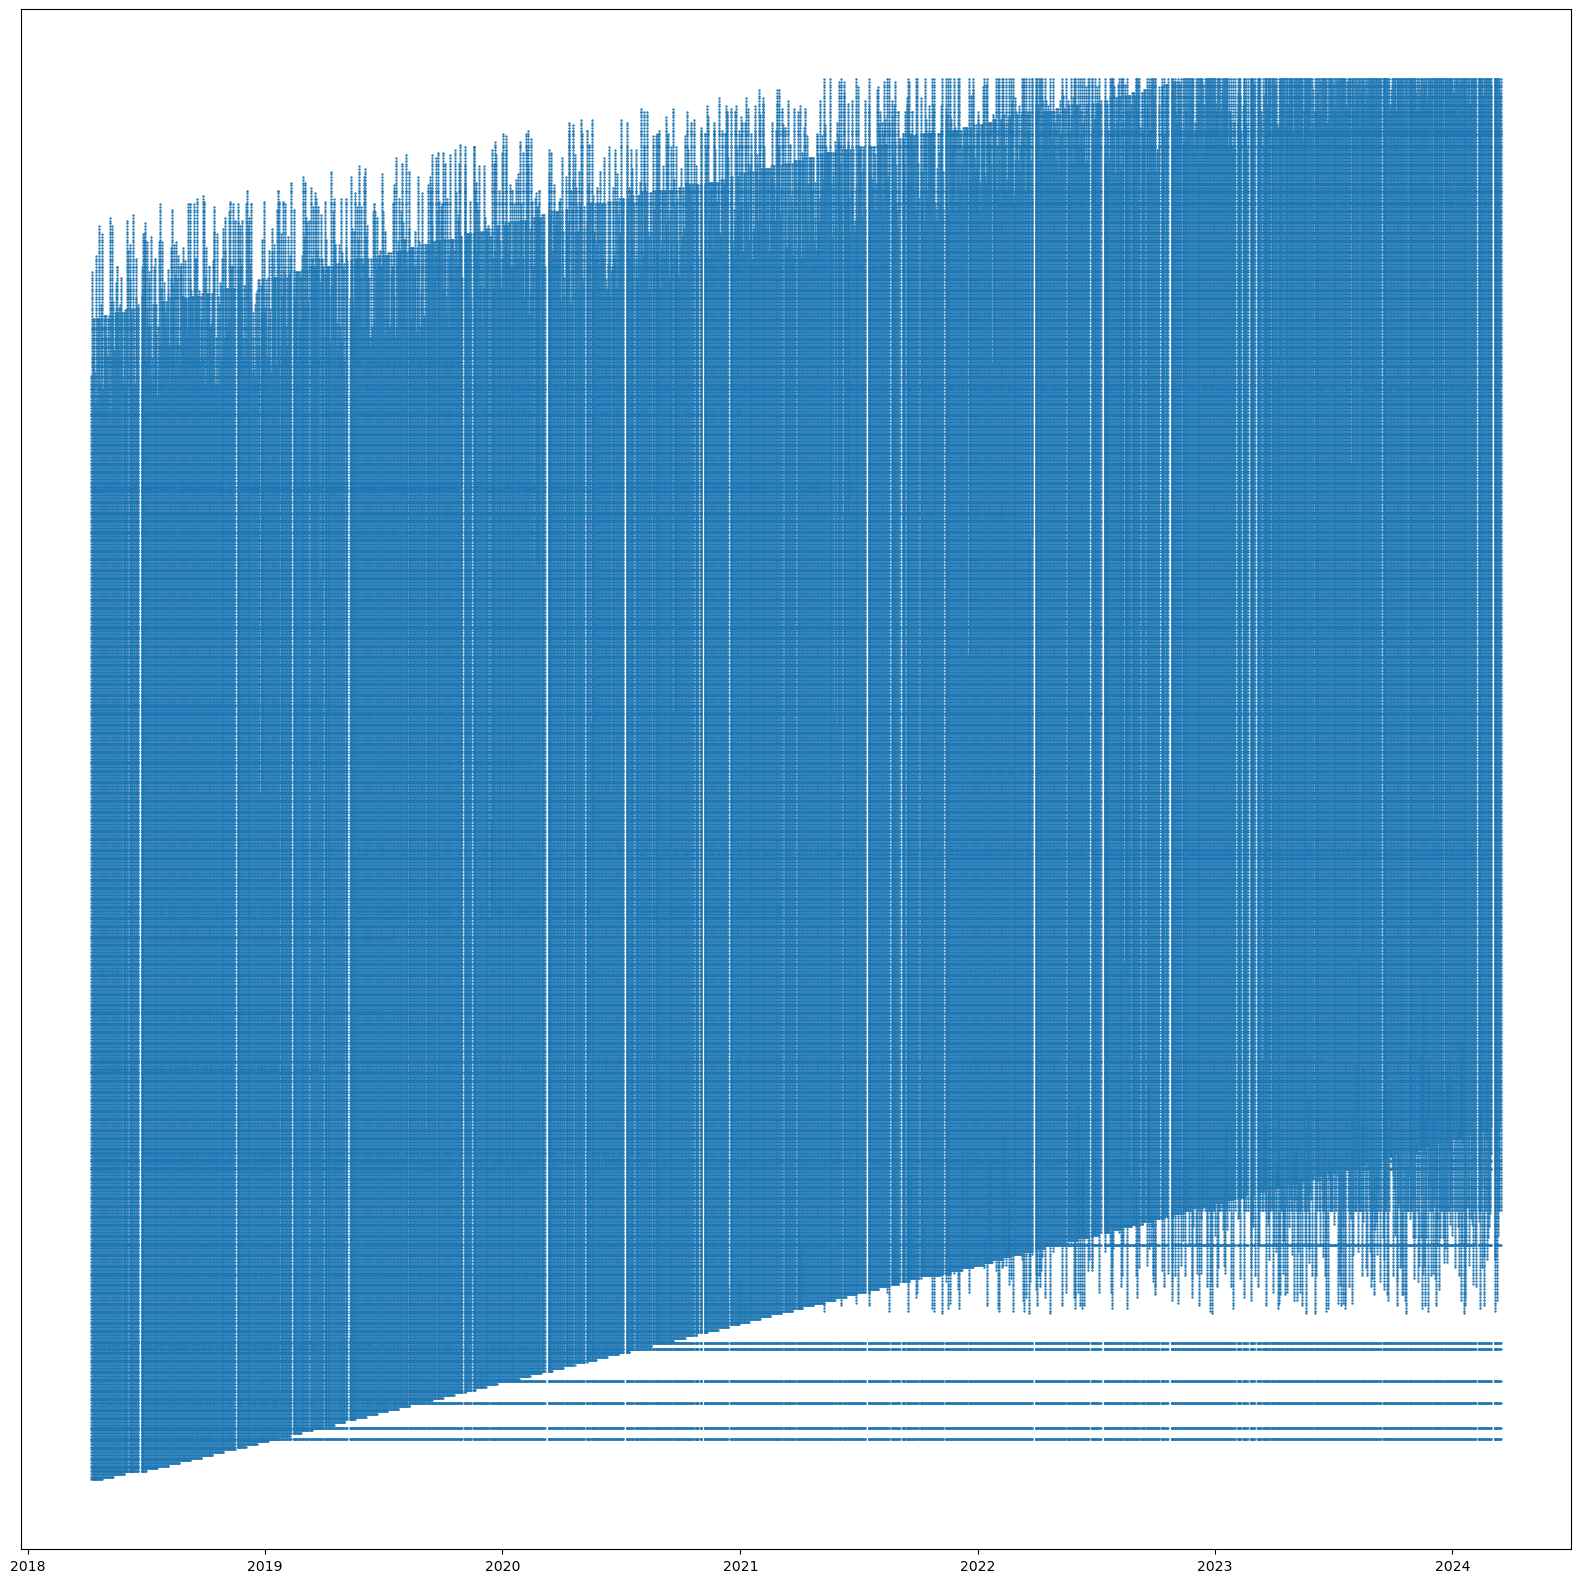

In [9]:
plt.figure(figsize=(20, 20))

plt.scatter(x=data_origin["ctl_loading_date"], y=data_origin["benchmark_id"], s=0.5) 
plt.yticks([]) 
plt.show()

In [10]:
result = pd.merge(data_origin, count_values_by_benchmark.loc[:, ['benchmark_id', 'count_vals']], on='benchmark_id', how='left')
result = result.sort_values(['ctl_loading_date', 'count_vals'])
result.head()

benchmark_id  \
0  00000000-0000-0000-0000-000000000001   
1  005F4F7B-D562-4B0F-BDC9-EB892065A955   
2  03B447D1-2B2D-4AC2-90C1-5DF2935D4FD1   
4  0532FCD2-5A26-4ED7-83C1-F482BE949312   
5  070B1DF3-5251-46A3-B706-B693B7148BC8   

                                      benchmark_name    date_of       quote  \
0                                             Ruonia 2018-04-09  513.893595   
1                                          RUGBITR1Y 2018-04-09  153.916680   
2                   50%RUCBITRBB3Y + 50%RUCBITRBBB3Y 2018-04-09   48.649655   
4  30.00%RUGBITR1Y + 1.10%ОФЗ-29006 + 68.90%ОФЗ-2... 2018-04-09   63.836133   
5                                       Ставка 7,39% 2018-04-09  243.524576   

   ctl_loading ctl_loading_date  count_vals  
0  38463471715       2018-04-09          17  
1  38463471715       2018-04-09          34  
2  38463471715       2018-04-09          51  
4  38463471715       2018-04-09         102  
5  38463471715       2018-04-09         119

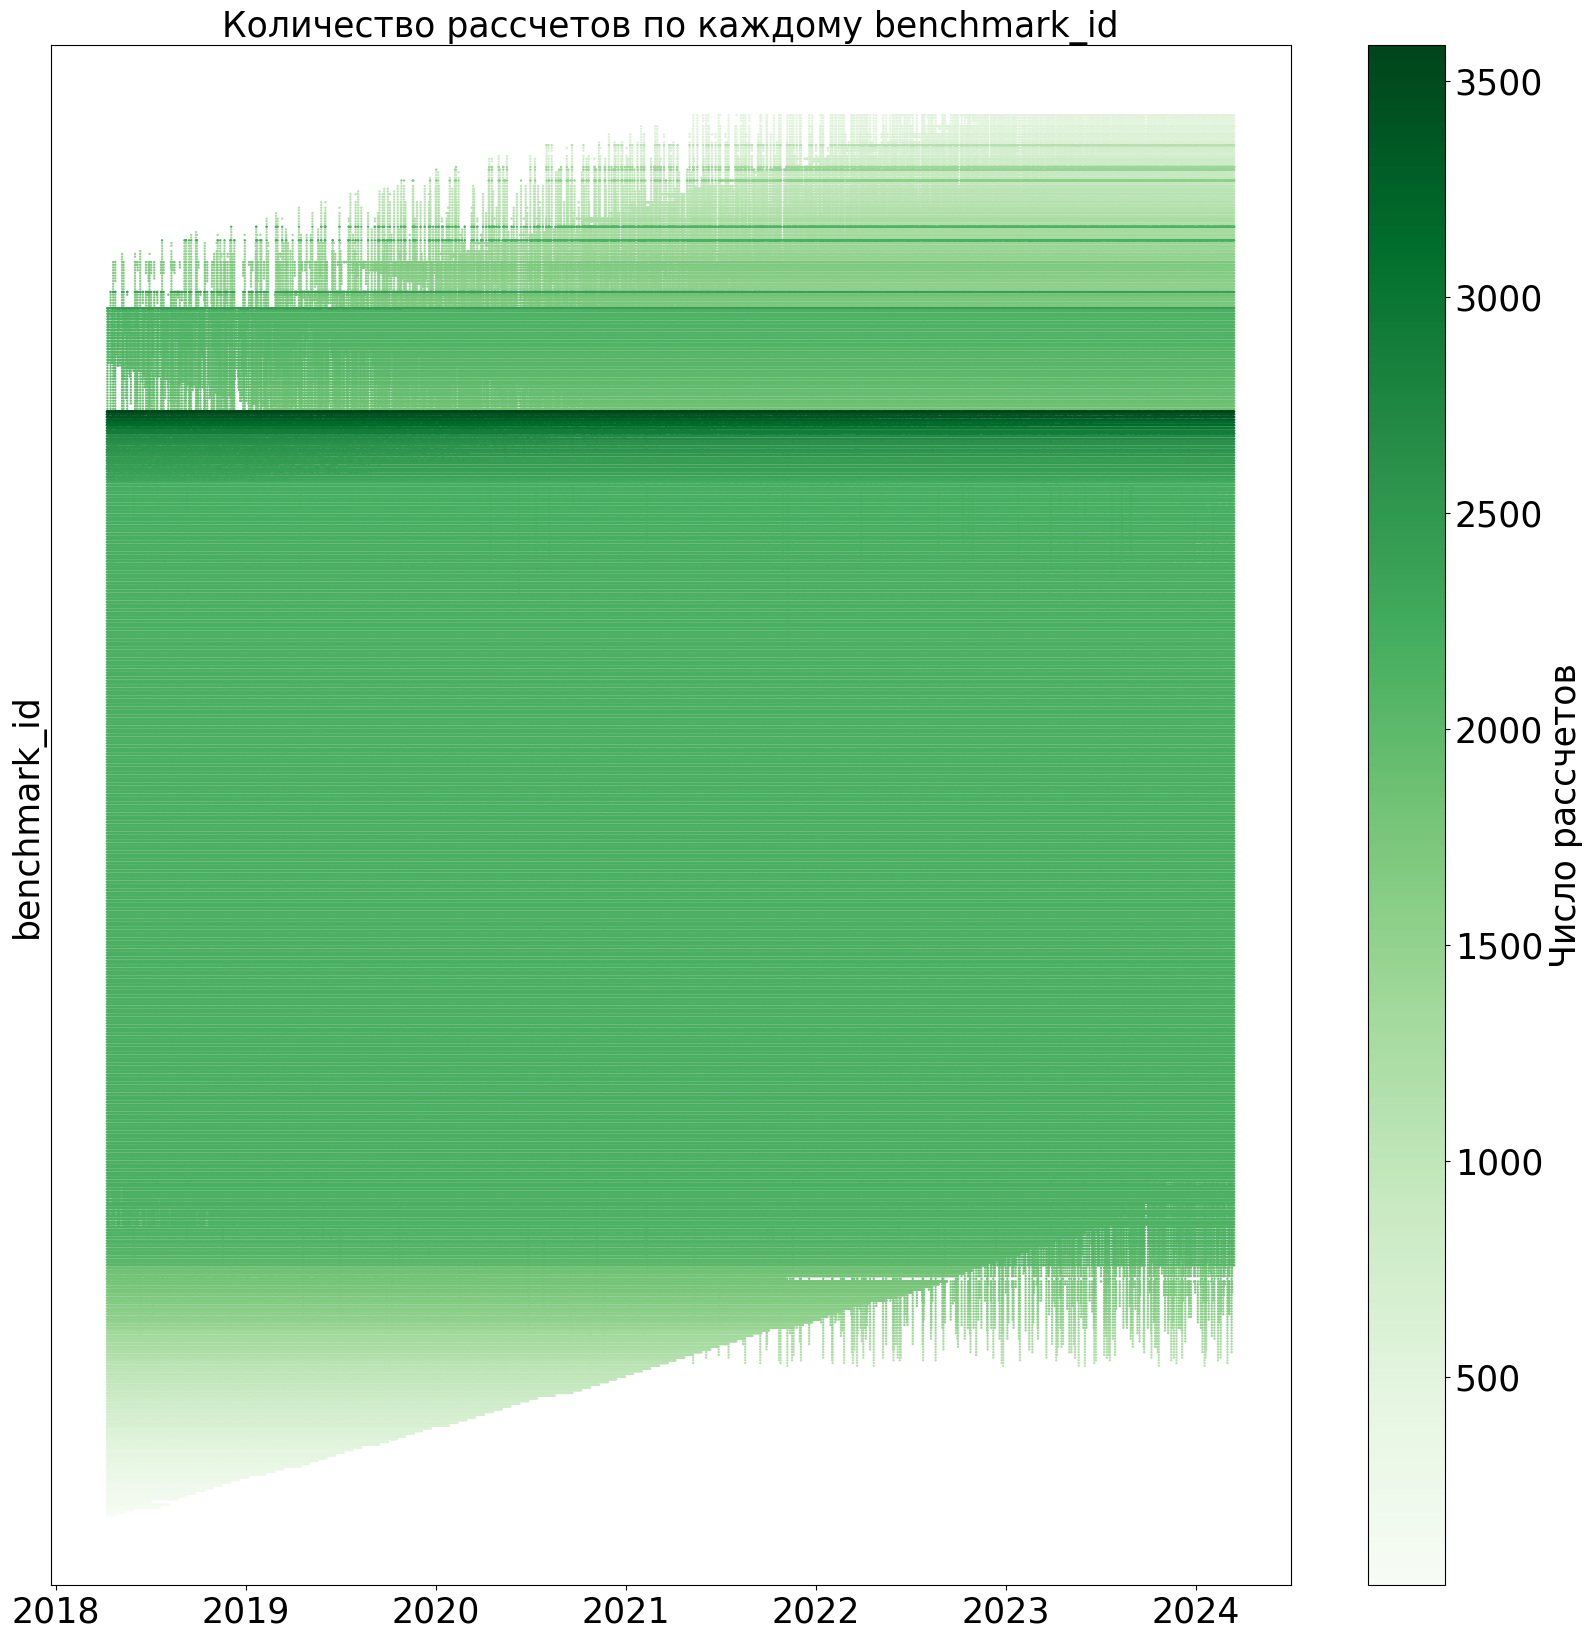

In [11]:
plt.rcParams['font.size'] = 25 
plt.figure(figsize=(20, 20))

plt.scatter(x=result["date_of"], y=result["benchmark_id"], s=0.5, c=result["count_vals"], cmap='Greens') 
plt.yticks([]) 
x = plt.colorbar()
x.set_label('Число рассчетов', fontsize=25)
plt.title("Количество рассчетов по каждому benchmark_id", fontsize = 25)
plt.ylabel("benchmark_id", fontsize = 25)


plt.show()

#  Создаем интервалы активности брэнчмарок

## Рассчитываем количество уникальных записей для каждой брэнчмарки по дням рссчета

In [10]:
data_origin_without_dupls = data_origin[data_origin.duplicated(['benchmark_id', 'date_of']) == False]

In [11]:
a = '050C195A-1D74-402F-B36D-63CA40AFE789'

In [12]:
data_count_without_dupls = data_origin_without_dupls.groupby(['benchmark_id']).count().reset_index()
data_count_without_dupls['count_vals'] = data_count_without_dupls.benchmark_name
data_count_without_dupls[data_count_without_dupls.benchmark_id == a]

benchmark_id  benchmark_name  date_of  quote  \
8  050C195A-1D74-402F-B36D-63CA40AFE789              85       85     85   

   ctl_loading  ctl_loading_date  count_vals  
8           85                85          85

In [13]:
count_values_by_benchmark[count_values_by_benchmark.benchmark_id == a]

benchmark_id  benchmark_name  date_of  quote  \
7  050C195A-1D74-402F-B36D-63CA40AFE789             153      153    153   

   ctl_loading  ctl_loading_date  count_vals  
7          153               153         153

## Рассчитываем периоды активности

In [14]:
result.head()

benchmark_id  \
0  00000000-0000-0000-0000-000000000001   
1  005F4F7B-D562-4B0F-BDC9-EB892065A955   
2  03B447D1-2B2D-4AC2-90C1-5DF2935D4FD1   
5  0532FCD2-5A26-4ED7-83C1-F482BE949312   
6  070B1DF3-5251-46A3-B706-B693B7148BC8   

                                      benchmark_name    date_of       quote  \
0                                             Ruonia 2018-04-09  513.893595   
1                                          RUGBITR1Y 2018-04-09  153.916680   
2                   50%RUCBITRBB3Y + 50%RUCBITRBBB3Y 2018-04-09   48.649655   
5  30.00%RUGBITR1Y + 1.10%ОФЗ-29006 + 68.90%ОФЗ-2... 2018-04-09   63.836133   
6                                       Ставка 7,39% 2018-04-09  243.524576   

   ctl_loading ctl_loading_date  count_vals  
0  38463471715       2018-04-09          17  
1  38463471715       2018-04-09          34  
2  38463471715       2018-04-09          51  
5  38463471715       2018-04-09         102  
6  38463471715       2018-04-09         119

In [15]:
start_date_df = result.loc[:, ['benchmark_id', 'date_of']].groupby(['benchmark_id']).min().reset_index()
start_date_df.rename(columns={'date_of': "start_date"}, inplace=True)
start_date_df.head()

benchmark_id start_date
0  00000000-0000-0000-0000-000000000001 2018-04-09
1  005F4F7B-D562-4B0F-BDC9-EB892065A955 2018-04-09
2  023BD1D9-8A68-4ED0-9A3C-ED726A4EF8CF 2018-04-09
3  031C5720-6EA0-4D01-9622-D52BBB917D9F 2018-04-09
4  036C8B72-AF6B-42A5-BE73-5DD4EC6B2FB9 2018-04-09

In [16]:
end_date_df = result.loc[:, ['benchmark_id', 'date_of']].groupby(['benchmark_id']).max().reset_index()
end_date_df.rename(columns={'date_of': "end_date"}, inplace=True)
end_date_df.head()

benchmark_id   end_date
0  00000000-0000-0000-0000-000000000001 2018-04-25
1  005F4F7B-D562-4B0F-BDC9-EB892065A955 2018-05-12
2  023BD1D9-8A68-4ED0-9A3C-ED726A4EF8CF 2024-03-15
3  031C5720-6EA0-4D01-9622-D52BBB917D9F 2024-03-15
4  036C8B72-AF6B-42A5-BE73-5DD4EC6B2FB9 2024-03-15

In [17]:
with_start_date = pd.merge(data_origin, start_date_df, on='benchmark_id', how='left')

In [18]:
data_start_end = pd.merge(with_start_date, end_date_df, on='benchmark_id', how='left')
data_start_end.head()

benchmark_id                    benchmark_name  \
0  00000000-0000-0000-0000-000000000001                            Ruonia   
1  005F4F7B-D562-4B0F-BDC9-EB892065A955                         RUGBITR1Y   
2  03B447D1-2B2D-4AC2-90C1-5DF2935D4FD1  50%RUCBITRBB3Y + 50%RUCBITRBBB3Y   
3  050C195A-1D74-402F-B36D-63CA40AFE789    60% RUGBITR1Y+40% RUONIA Index   
4  050C195A-1D74-402F-B36D-63CA40AFE789    60% RUGBITR1Y+40% RUONIA Index   

     date_of       quote  ctl_loading ctl_loading_date start_date   end_date  
0 2018-04-09  513.893595  38463471715       2018-04-09 2018-04-09 2018-04-25  
1 2018-04-09  153.916680  38463471715       2018-04-09 2018-04-09 2018-05-12  
2 2018-04-09   48.649655  38463471715       2018-04-09 2018-04-09 2018-05-29  
3 2018-04-09  277.774791  38463471715       2018-04-09 2018-04-09 2018-07-02  
4 2018-04-09  277.774791  38463471715       2018-04-09 2018-04-09 2018-07-02

In [19]:
benchmark_start_end = data_start_end.loc[:, ['benchmark_id', 'start_date', 'end_date']].drop_duplicates(['benchmark_id'])

In [20]:
benchmark_start_end['time_delta'] = benchmark_start_end.end_date - benchmark_start_end.start_date + datetime.timedelta(1)
benchmark_start_end_with_count = pd.merge(benchmark_start_end, data_count_without_dupls.loc[:, ['benchmark_id', 'count_vals']], on='benchmark_id', how='left')
benchmark_start_end_with_count

benchmark_id start_date   end_date time_delta  \
0    00000000-0000-0000-0000-000000000001 2018-04-09 2018-04-25    17 days   
1    005F4F7B-D562-4B0F-BDC9-EB892065A955 2018-04-09 2018-05-12    34 days   
2    03B447D1-2B2D-4AC2-90C1-5DF2935D4FD1 2018-04-09 2018-05-29    51 days   
3    050C195A-1D74-402F-B36D-63CA40AFE789 2018-04-09 2018-07-02    85 days   
4    0532FCD2-5A26-4ED7-83C1-F482BE949312 2018-04-09 2018-07-19   102 days   
..                                    ...        ...        ...        ...   
511  F68E9BE2-B3A2-4923-B648-14C424A84EF0 2021-01-30 2024-03-15  1141 days   
512  F846C875-184D-4862-8C0E-5A5D58E4FD20 2021-05-10 2024-03-15  1041 days   
513  FB5DFAD6-CF72-4C1A-B78C-EE42A1D0BFE0 2021-05-10 2024-03-15  1041 days   
514  FCE411C7-6A5C-4AB3-8626-070844143139 2021-05-10 2024-03-15  1041 days   
515  FDD3894E-BD97-45DB-B236-A2DB271FFFDA 2021-05-10 2024-03-15  1041 days   

     count_vals  
0            17  
1            34  
2            51  
3            85  
4           102  
..          ...  
511         542  
512         525  
513         512  
514         498  
515         484  

[516 rows x 5 columns]

In [21]:
benchmark_start_end_with_count['frequency'] = benchmark_start_end_with_count.time_delta / benchmark_start_end_with_count.count_vals

In [22]:
benchmark_start_end_with_count

benchmark_id start_date   end_date time_delta  \
0    00000000-0000-0000-0000-000000000001 2018-04-09 2018-04-25    17 days   
1    005F4F7B-D562-4B0F-BDC9-EB892065A955 2018-04-09 2018-05-12    34 days   
2    03B447D1-2B2D-4AC2-90C1-5DF2935D4FD1 2018-04-09 2018-05-29    51 days   
3    050C195A-1D74-402F-B36D-63CA40AFE789 2018-04-09 2018-07-02    85 days   
4    0532FCD2-5A26-4ED7-83C1-F482BE949312 2018-04-09 2018-07-19   102 days   
..                                    ...        ...        ...        ...   
511  F68E9BE2-B3A2-4923-B648-14C424A84EF0 2021-01-30 2024-03-15  1141 days   
512  F846C875-184D-4862-8C0E-5A5D58E4FD20 2021-05-10 2024-03-15  1041 days   
513  FB5DFAD6-CF72-4C1A-B78C-EE42A1D0BFE0 2021-05-10 2024-03-15  1041 days   
514  FCE411C7-6A5C-4AB3-8626-070844143139 2021-05-10 2024-03-15  1041 days   
515  FDD3894E-BD97-45DB-B236-A2DB271FFFDA 2021-05-10 2024-03-15  1041 days   

     count_vals                 frequency  
0            17           1 days 00:00:00  
1            34           1 days 00:00:00  
2            51           1 days 00:00:00  
3            85           1 days 00:00:00  
4           102           1 days 00:00:00  
..          ...                       ...  
511         542 2 days 02:31:26.346863468  
512         525 1 days 23:35:18.857142857  
513         512    2 days 00:47:48.750000  
514         498 2 days 02:10:07.228915662  
515         484 2 days 03:37:11.404958677  

[516 rows x 6 columns]

In [23]:
benchmark_start_end_with_count['frequency'] = benchmark_start_end_with_count['frequency'].dt.days
benchmark_start_end_with_count['frequency'] = pd.to_timedelta(benchmark_start_end_with_count['frequency'], unit='D')
benchmark_start_end_with_count

benchmark_id start_date   end_date time_delta  \
0    00000000-0000-0000-0000-000000000001 2018-04-09 2018-04-25    17 days   
1    005F4F7B-D562-4B0F-BDC9-EB892065A955 2018-04-09 2018-05-12    34 days   
2    03B447D1-2B2D-4AC2-90C1-5DF2935D4FD1 2018-04-09 2018-05-29    51 days   
3    050C195A-1D74-402F-B36D-63CA40AFE789 2018-04-09 2018-07-02    85 days   
4    0532FCD2-5A26-4ED7-83C1-F482BE949312 2018-04-09 2018-07-19   102 days   
..                                    ...        ...        ...        ...   
511  F68E9BE2-B3A2-4923-B648-14C424A84EF0 2021-01-30 2024-03-15  1141 days   
512  F846C875-184D-4862-8C0E-5A5D58E4FD20 2021-05-10 2024-03-15  1041 days   
513  FB5DFAD6-CF72-4C1A-B78C-EE42A1D0BFE0 2021-05-10 2024-03-15  1041 days   
514  FCE411C7-6A5C-4AB3-8626-070844143139 2021-05-10 2024-03-15  1041 days   
515  FDD3894E-BD97-45DB-B236-A2DB271FFFDA 2021-05-10 2024-03-15  1041 days   

     count_vals frequency  
0            17    1 days  
1            34    1 days  
2            51    1 days  
3            85    1 days  
4           102    1 days  
..          ...       ...  
511         542    2 days  
512         525    1 days  
513         512    2 days  
514         498    2 days  
515         484    2 days  

[516 rows x 6 columns]

In [24]:
benchmark_start_end_with_count.frequency.max()

Timedelta('2 days 00:00:00')

## Определяем медианную задержку поставок данных по каждому брэнчмарку

In [25]:
data_origin_without_dupls['time_delay'] = data_origin_without_dupls.ctl_loading_date - data_origin_without_dupls.date_of
data_origin_without_dupls

C:\Users\Дмитрий\AppData\Local\Temp\ipykernel_16992\3036709115.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



benchmark_id  \
0       00000000-0000-0000-0000-000000000001   
1       005F4F7B-D562-4B0F-BDC9-EB892065A955   
2       03B447D1-2B2D-4AC2-90C1-5DF2935D4FD1   
3       050C195A-1D74-402F-B36D-63CA40AFE789   
5       0532FCD2-5A26-4ED7-83C1-F482BE949312   
...                                      ...   
994999  F68E9BE2-B3A2-4923-B648-14C424A84EF0   
995000  F846C875-184D-4862-8C0E-5A5D58E4FD20   
995001  FB5DFAD6-CF72-4C1A-B78C-EE42A1D0BFE0   
995002  FCE411C7-6A5C-4AB3-8626-070844143139   
995003  FDD3894E-BD97-45DB-B236-A2DB271FFFDA   

                                           benchmark_name    date_of  \
0                                                  Ruonia 2018-04-09   
1                                               RUGBITR1Y 2018-04-09   
2                        50%RUCBITRBB3Y + 50%RUCBITRBBB3Y 2018-04-09   
3                          60% RUGBITR1Y+40% RUONIA Index 2018-04-09   
5       30.00%RUGBITR1Y + 1.10%ОФЗ-29006 + 68.90%ОФЗ-2... 2018-04-09   
...                                                   ...        ...   
994999                                          ОФЗ 24021 2024-03-15   
995000                50%*RUGBITR3Y + 50%*Ставка 12.4174% 2024-03-15   
995001                                        Ставка 7,7% 2024-03-15   
995002                                          MBI TR 3Y 2024-03-15   
995003                             70% EMCR + 30% B13TTRU 2024-03-15   

              quote  ctl_loading ctl_loading_date time_delay  
0        513.893595  38463471715       2018-04-09     0 days  
1        153.916680  38463471715       2018-04-09     0 days  
2         48.649655  38463471715       2018-04-09     0 days  
3        277.774791  38463471715       2018-04-09     0 days  
5         63.836133  38463471715       2018-04-09     0 days  
...             ...          ...              ...        ...  
994999   861.989892  83427809714       2024-03-15     0 days  
995000     7.639006  83427809714       2024-03-15     0 days  
995001     2.477175  83427809714       2024-03-15     0 days  
995002  1493.885023  83427809714       2024-03-15     0 days  
995003   198.669337  83427809714       2024-03-15     0 days  

[926169 rows x 7 columns]

In [26]:
time_delay = data_origin_without_dupls[data_origin_without_dupls.time_delay > \
                           datetime.timedelta(1)].loc[:, ['benchmark_id', 'time_delay']].groupby(['benchmark_id']).max().reset_index()

In [27]:
time_delay.time_delay

0     7 days
1     7 days
2     7 days
3     7 days
4     7 days
       ...  
508   7 days
509   5 days
510   7 days
511   7 days
512   5 days
Name: time_delay, Length: 513, dtype: timedelta64[ns]

In [28]:
benchmark_start_end_with_delay= pd.merge(benchmark_start_end_with_count, time_delay, on='benchmark_id', how='left').fillna(datetime.timedelta(0))

In [29]:
benchmark_start_end_with_delay

benchmark_id start_date   end_date time_delta  \
0    00000000-0000-0000-0000-000000000001 2018-04-09 2018-04-25    17 days   
1    005F4F7B-D562-4B0F-BDC9-EB892065A955 2018-04-09 2018-05-12    34 days   
2    03B447D1-2B2D-4AC2-90C1-5DF2935D4FD1 2018-04-09 2018-05-29    51 days   
3    050C195A-1D74-402F-B36D-63CA40AFE789 2018-04-09 2018-07-02    85 days   
4    0532FCD2-5A26-4ED7-83C1-F482BE949312 2018-04-09 2018-07-19   102 days   
..                                    ...        ...        ...        ...   
511  F68E9BE2-B3A2-4923-B648-14C424A84EF0 2021-01-30 2024-03-15  1141 days   
512  F846C875-184D-4862-8C0E-5A5D58E4FD20 2021-05-10 2024-03-15  1041 days   
513  FB5DFAD6-CF72-4C1A-B78C-EE42A1D0BFE0 2021-05-10 2024-03-15  1041 days   
514  FCE411C7-6A5C-4AB3-8626-070844143139 2021-05-10 2024-03-15  1041 days   
515  FDD3894E-BD97-45DB-B236-A2DB271FFFDA 2021-05-10 2024-03-15  1041 days   

     count_vals frequency time_delay  
0            17    1 days     0 days  
1            34    1 days     0 days  
2            51    1 days     0 days  
3            85    1 days     5 days  
4           102    1 days     5 days  
..          ...       ...        ...  
511         542    2 days     5 days  
512         525    1 days     5 days  
513         512    2 days     5 days  
514         498    2 days     5 days  
515         484    2 days     5 days  

[516 rows x 7 columns]

In [30]:
benchmark_start_end_corrected = benchmark_start_end_with_delay.copy()

## Рассчитываем число активных бэнчмарок по дням

In [31]:
benchmark_start_end_corrected['start_date'] = benchmark_start_end_with_delay['start_date'] - \
    benchmark_start_end_with_delay['frequency']-benchmark_start_end_with_delay['time_delay']
benchmark_start_end_corrected['end_date'] = benchmark_start_end_with_delay['end_date'] +\
      benchmark_start_end_with_delay['frequency']+benchmark_start_end_with_delay['time_delay']

benchmark_start_end_corrected

benchmark_id start_date   end_date time_delta  \
0    00000000-0000-0000-0000-000000000001 2018-04-08 2018-04-26    17 days   
1    005F4F7B-D562-4B0F-BDC9-EB892065A955 2018-04-08 2018-05-13    34 days   
2    03B447D1-2B2D-4AC2-90C1-5DF2935D4FD1 2018-04-08 2018-05-30    51 days   
3    050C195A-1D74-402F-B36D-63CA40AFE789 2018-04-03 2018-07-08    85 days   
4    0532FCD2-5A26-4ED7-83C1-F482BE949312 2018-04-03 2018-07-25   102 days   
..                                    ...        ...        ...        ...   
511  F68E9BE2-B3A2-4923-B648-14C424A84EF0 2021-01-23 2024-03-22  1141 days   
512  F846C875-184D-4862-8C0E-5A5D58E4FD20 2021-05-04 2024-03-21  1041 days   
513  FB5DFAD6-CF72-4C1A-B78C-EE42A1D0BFE0 2021-05-03 2024-03-22  1041 days   
514  FCE411C7-6A5C-4AB3-8626-070844143139 2021-05-03 2024-03-22  1041 days   
515  FDD3894E-BD97-45DB-B236-A2DB271FFFDA 2021-05-03 2024-03-22  1041 days   

     count_vals frequency time_delay  
0            17    1 days     0 days  
1            34    1 days     0 days  
2            51    1 days     0 days  
3            85    1 days     5 days  
4           102    1 days     5 days  
..          ...       ...        ...  
511         542    2 days     5 days  
512         525    1 days     5 days  
513         512    2 days     5 days  
514         498    2 days     5 days  
515         484    2 days     5 days  

[516 rows x 7 columns]

In [32]:
all_dates = pd.date_range(start='2018-04-09', end='2024-03-15')

In [33]:
counts = []
for single_date in all_dates:
    # Подсчет количества вхождений текущей даты в интервалы
    count = ((benchmark_start_end_corrected['start_date'] <= single_date) & (benchmark_start_end_corrected['end_date'] >= single_date)).sum()
    counts.append(count)

In [34]:
dates_counts = pd.DataFrame({
    'date': all_dates,
    'count_active': counts
})
dates_counts.tail(20)

date  count_active
2148 2024-02-25           460
2149 2024-02-26           460
2150 2024-02-27           460
2151 2024-02-28           460
2152 2024-02-29           460
2153 2024-03-01           460
2154 2024-03-02           460
2155 2024-03-03           460
2156 2024-03-04           460
2157 2024-03-05           460
2158 2024-03-06           460
2159 2024-03-07           460
2160 2024-03-08           460
2161 2024-03-09           456
2162 2024-03-10           456
2163 2024-03-11           456
2164 2024-03-12           456
2165 2024-03-13           456
2166 2024-03-14           456
2167 2024-03-15           456

In [35]:
benchmark_start_end_corrected[benchmark_start_end_corrected.end_date == '2024-03-08']

benchmark_id start_date   end_date time_delta  \
62  3CB79230-B78B-4B6C-A7EA-C2D0FB379F6A 2018-04-03 2024-03-08  2155 days   
63  3D9F801B-7DF7-4881-8807-972A684D8A85 2018-04-03 2024-03-08  2155 days   
64  3E712C0C-B673-48A8-B573-2DD7875AF7B2 2018-04-03 2024-03-08  2155 days   
65  3F7FB511-EDB4-4FCA-84AF-2E71109EB66C 2018-04-03 2024-03-08  2155 days   

    count_vals frequency time_delay  
62        1098    1 days     5 days  
63        1127    1 days     5 days  
64        1160    1 days     5 days  
65        1184    1 days     5 days

In [36]:
benchmark_start_end_corrected[benchmark_start_end_corrected.benchmark_id == '3CB79230-B78B-4B6C-A7EA-C2D0FB379F6A']

benchmark_id start_date   end_date time_delta  \
62  3CB79230-B78B-4B6C-A7EA-C2D0FB379F6A 2018-04-03 2024-03-08  2155 days   

    count_vals frequency time_delay  
62        1098    1 days     5 days

In [37]:
dates_counts = dates_counts.rename(columns={'date': 'Дата', 'count_active': 'Количество активных бэнчмарок'})

C:\Users\Дмитрий\AppData\Local\Temp\ipykernel_16992\111603952.py:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


d:\Programming\Python\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

d:\Programming\Python\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



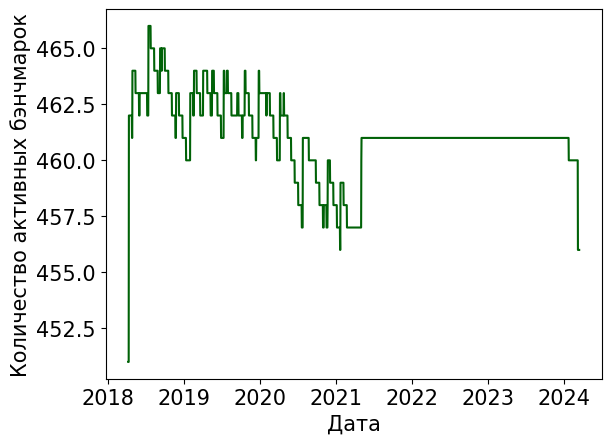

In [38]:
plt.rcParams['font.size'] = 15 
sns.lineplot(x="Дата", y="Количество активных бэнчмарок", ci=None, color='#006207',
             data=dates_counts)

plt.ylabel('Количество активных бэнчмарок')
plt.xlabel('Дата')
plt.tick_params(axis='both')
x = dates_counts['Дата']
y = dates_counts['Количество активных бэнчмарок']

In [39]:
data_count_ld = data_origin.groupby(['ctl_loading_date']).count().reset_index()
data_count_ld['count_postbranches'] = data_count_ld['benchmark_name']
data_count_ld = data_count_ld.loc[:,['ctl_loading_date', 'count_postbranches']]
data_count_ld.rename(columns={'ctl_loading_date': "date"}, inplace=True)
data_count_ld

date  count_postbranches
0    2018-04-09                 435
1    2018-04-10                 476
2    2018-04-11                 458
3    2018-04-12                 443
4    2018-04-13                 458
...         ...                 ...
2001 2024-03-11                 467
2002 2024-03-12                 458
2003 2024-03-13                 458
2004 2024-03-14                 422
2005 2024-03-15                 458

[2006 rows x 2 columns]

In [40]:
dates_active_posts = pd.merge(dates_counts, data_count_ld, on='date', how='left').fillna(0)
dates_active_posts['count_postbranches'] =  dates_active_posts['count_postbranches'].astype('int')
dates_active_posts

KeyError: 'date'

<Axes: xlabel='count_active', ylabel='count_postbranches'>

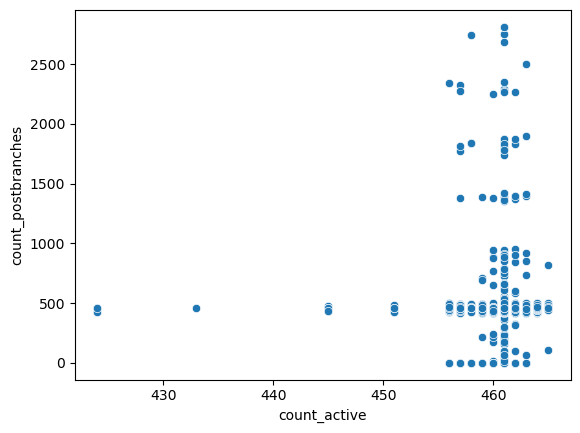

In [ ]:
sns.scatterplot(x='count_active', y='count_postbranches', data=dates_active_posts)

In [41]:
plt.figure(figsize=(20, 15))
sns.lineplot(x='date', y='count_postbranches', ci=None, data=dates_active_posts, label='count_postbranches')
sns.lineplot(x='date', y='count_active', ci=None, data=dates_active_posts, label='Count Active')

plt.legend()
plt.show()

NameError: name 'dates_active_posts' is not defined

<Figure size 2000x1500 with 0 Axes>

# Анализ по дням

In [42]:
data_count_ld = data_origin.groupby(['ctl_loading_date']).count().reset_index()

all_dates = pd.date_range(start='2018-04-09', end='2024-03-15')
all_dates = pd.DataFrame({'ctl_loading_date': all_dates})
result = pd.merge(all_dates, data_count_ld, on='ctl_loading_date', how='left').fillna(0)
data_count_ld = result
data_count_ld['year'] = data_count_ld['ctl_loading_date'].dt.year
data_count_ld = data_count_ld.rename(columns={'quote': 'Количество строк в день', 'abstract_date': 'Дата', 'year': 'Год'})
data_count_ld['Дата'] = data_count_ld['ctl_loading_date'].apply(lambda x: x.replace(year=2000))

In [43]:
fig = px.line(data_count_ld, x="Дата", y="Количество строк в день", color='Год')
fig.update_xaxes(tickformat="%b")
fig.update_layout(
    title_font_size=24,         # Размер шрифта для заголовка графика
    font_size=18,               # Основной размер шрифта для остального текста
    legend_title_font_size=22,  # Размер шрифта для заголовка легенды
    legend_font_size=18         # Размер шрифта для элементов легенды
)

# Частота расчета бэнчмарков

In [44]:
data_origin

benchmark_id  \
0       00000000-0000-0000-0000-000000000001   
1       005F4F7B-D562-4B0F-BDC9-EB892065A955   
2       03B447D1-2B2D-4AC2-90C1-5DF2935D4FD1   
3       050C195A-1D74-402F-B36D-63CA40AFE789   
4       050C195A-1D74-402F-B36D-63CA40AFE789   
...                                      ...   
994999  F68E9BE2-B3A2-4923-B648-14C424A84EF0   
995000  F846C875-184D-4862-8C0E-5A5D58E4FD20   
995001  FB5DFAD6-CF72-4C1A-B78C-EE42A1D0BFE0   
995002  FCE411C7-6A5C-4AB3-8626-070844143139   
995003  FDD3894E-BD97-45DB-B236-A2DB271FFFDA   

                             benchmark_name    date_of        quote  \
0                                    Ruonia 2018-04-09   513.893595   
1                                 RUGBITR1Y 2018-04-09   153.916680   
2          50%RUCBITRBB3Y + 50%RUCBITRBBB3Y 2018-04-09    48.649655   
3            60% RUGBITR1Y+40% RUONIA Index 2018-04-09   277.774791   
4            60% RUGBITR1Y+40% RUONIA Index 2018-04-09   277.774791   
...                                     ...        ...          ...   
994999                            ОФЗ 24021 2024-03-15   861.989892   
995000  50%*RUGBITR3Y + 50%*Ставка 12.4174% 2024-03-15     7.639006   
995001                          Ставка 7,7% 2024-03-15     2.477175   
995002                            MBI TR 3Y 2024-03-15  1493.885023   
995003               70% EMCR + 30% B13TTRU 2024-03-15   198.669337   

        ctl_loading ctl_loading_date  
0       38463471715       2018-04-09  
1       38463471715       2018-04-09  
2       38463471715       2018-04-09  
3       38463471715       2018-04-09  
4       38463471715       2018-04-09  
...             ...              ...  
994999  83427809714       2024-03-15  
995000  83427809714       2024-03-15  
995001  83427809714       2024-03-15  
995002  83427809714       2024-03-15  
995003  83427809714       2024-03-15  

[995004 rows x 6 columns]

In [45]:
x = data_origin.sort_values(['date_of']).groupby(['benchmark_id']).apply(lambda x: x.date_of.diff().max()).reset_index()

In [46]:
x[x[0]> datetime.timedelta(5)]

benchmark_id        0
115  3BE6F961-D262-4E63-9CDC-9CEAEC9CE9CC 249 days
117  3CB79230-B78B-4B6C-A7EA-C2D0FB379F6A 246 days
119  3D9F801B-7DF7-4881-8807-972A684D8A85 127 days
121  3E712C0C-B673-48A8-B573-2DD7875AF7B2 111 days
123  3F7FB511-EDB4-4FCA-84AF-2E71109EB66C  78 days
..                                    ...      ...
505  F68E9BE2-B3A2-4923-B648-14C424A84EF0  69 days
507  F846C875-184D-4862-8C0E-5A5D58E4FD20  21 days
510  FB5DFAD6-CF72-4C1A-B78C-EE42A1D0BFE0  24 days
512  FCE411C7-6A5C-4AB3-8626-070844143139  24 days
515  FDD3894E-BD97-45DB-B236-A2DB271FFFDA  29 days

[140 rows x 2 columns]

In [47]:
y = data_origin[data_origin.benchmark_id.isin(x[x[0]> datetime.timedelta(5)].benchmark_id)].sort_values(['date_of'])

In [48]:
z = y.groupby(['benchmark_id', 'date_of']).count().reset_index()

In [49]:
z['timedelta'] = z.date_of.diff()

In [50]:
df_filtered = z.groupby('benchmark_id').apply(lambda x: x.iloc[1:]).reset_index(drop=True)

In [51]:
s = benchmark_start_end_corrected[benchmark_start_end_corrected['start_date'] <= '2018-04-10']

In [52]:
df_filtered = df_filtered[df_filtered.benchmark_id.isin(s.benchmark_id)]

In [53]:
df_filtered['timedelta'] = df_filtered['timedelta'].dt.days

In [54]:
df_filtered = df_filtered.rename(columns = {'timedelta': 'Частота расчета', 'date_of': 'Дата'})

In [55]:
fig = px.line(df_filtered, x="Дата", y="Частота расчета", color='benchmark_id', line_shape='spline')
fig.update_layout(
    title_font_size=24,         # Размер шрифта для заголовка графика
    font_size=18,               # Основной размер шрифта для остального текста
    legend_title_font_size=22,  # Размер шрифта для заголовка легенды
    legend_font_size=18         # Размер шрифта для элементов легенды
)